##Importing Libraries

In [1]:
import torch
import torchvision.models as models
from PIL import Image

##Downloading the tennis image and renaming it to tennis.jpg

In [2]:
!wget https://upload.wikimedia.org/wikipedia/commons/4/41/Closeup_of_a_tennis_ball_%282%29.jpg -O "tennis.jpg"

--2020-09-07 15:06:35--  https://upload.wikimedia.org/wikipedia/commons/4/41/Closeup_of_a_tennis_ball_%282%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2355760 (2.2M) [image/jpeg]
Saving to: ‘tennis.jpg’

tennis.jpg          100%[===================>]   2.25M  6.45MB/s    in 0.3s    

2020-09-07 15:06:36 (6.45 MB/s) - ‘tennis.jpg’ saved [2355760/2355760]



##Visualizing the image

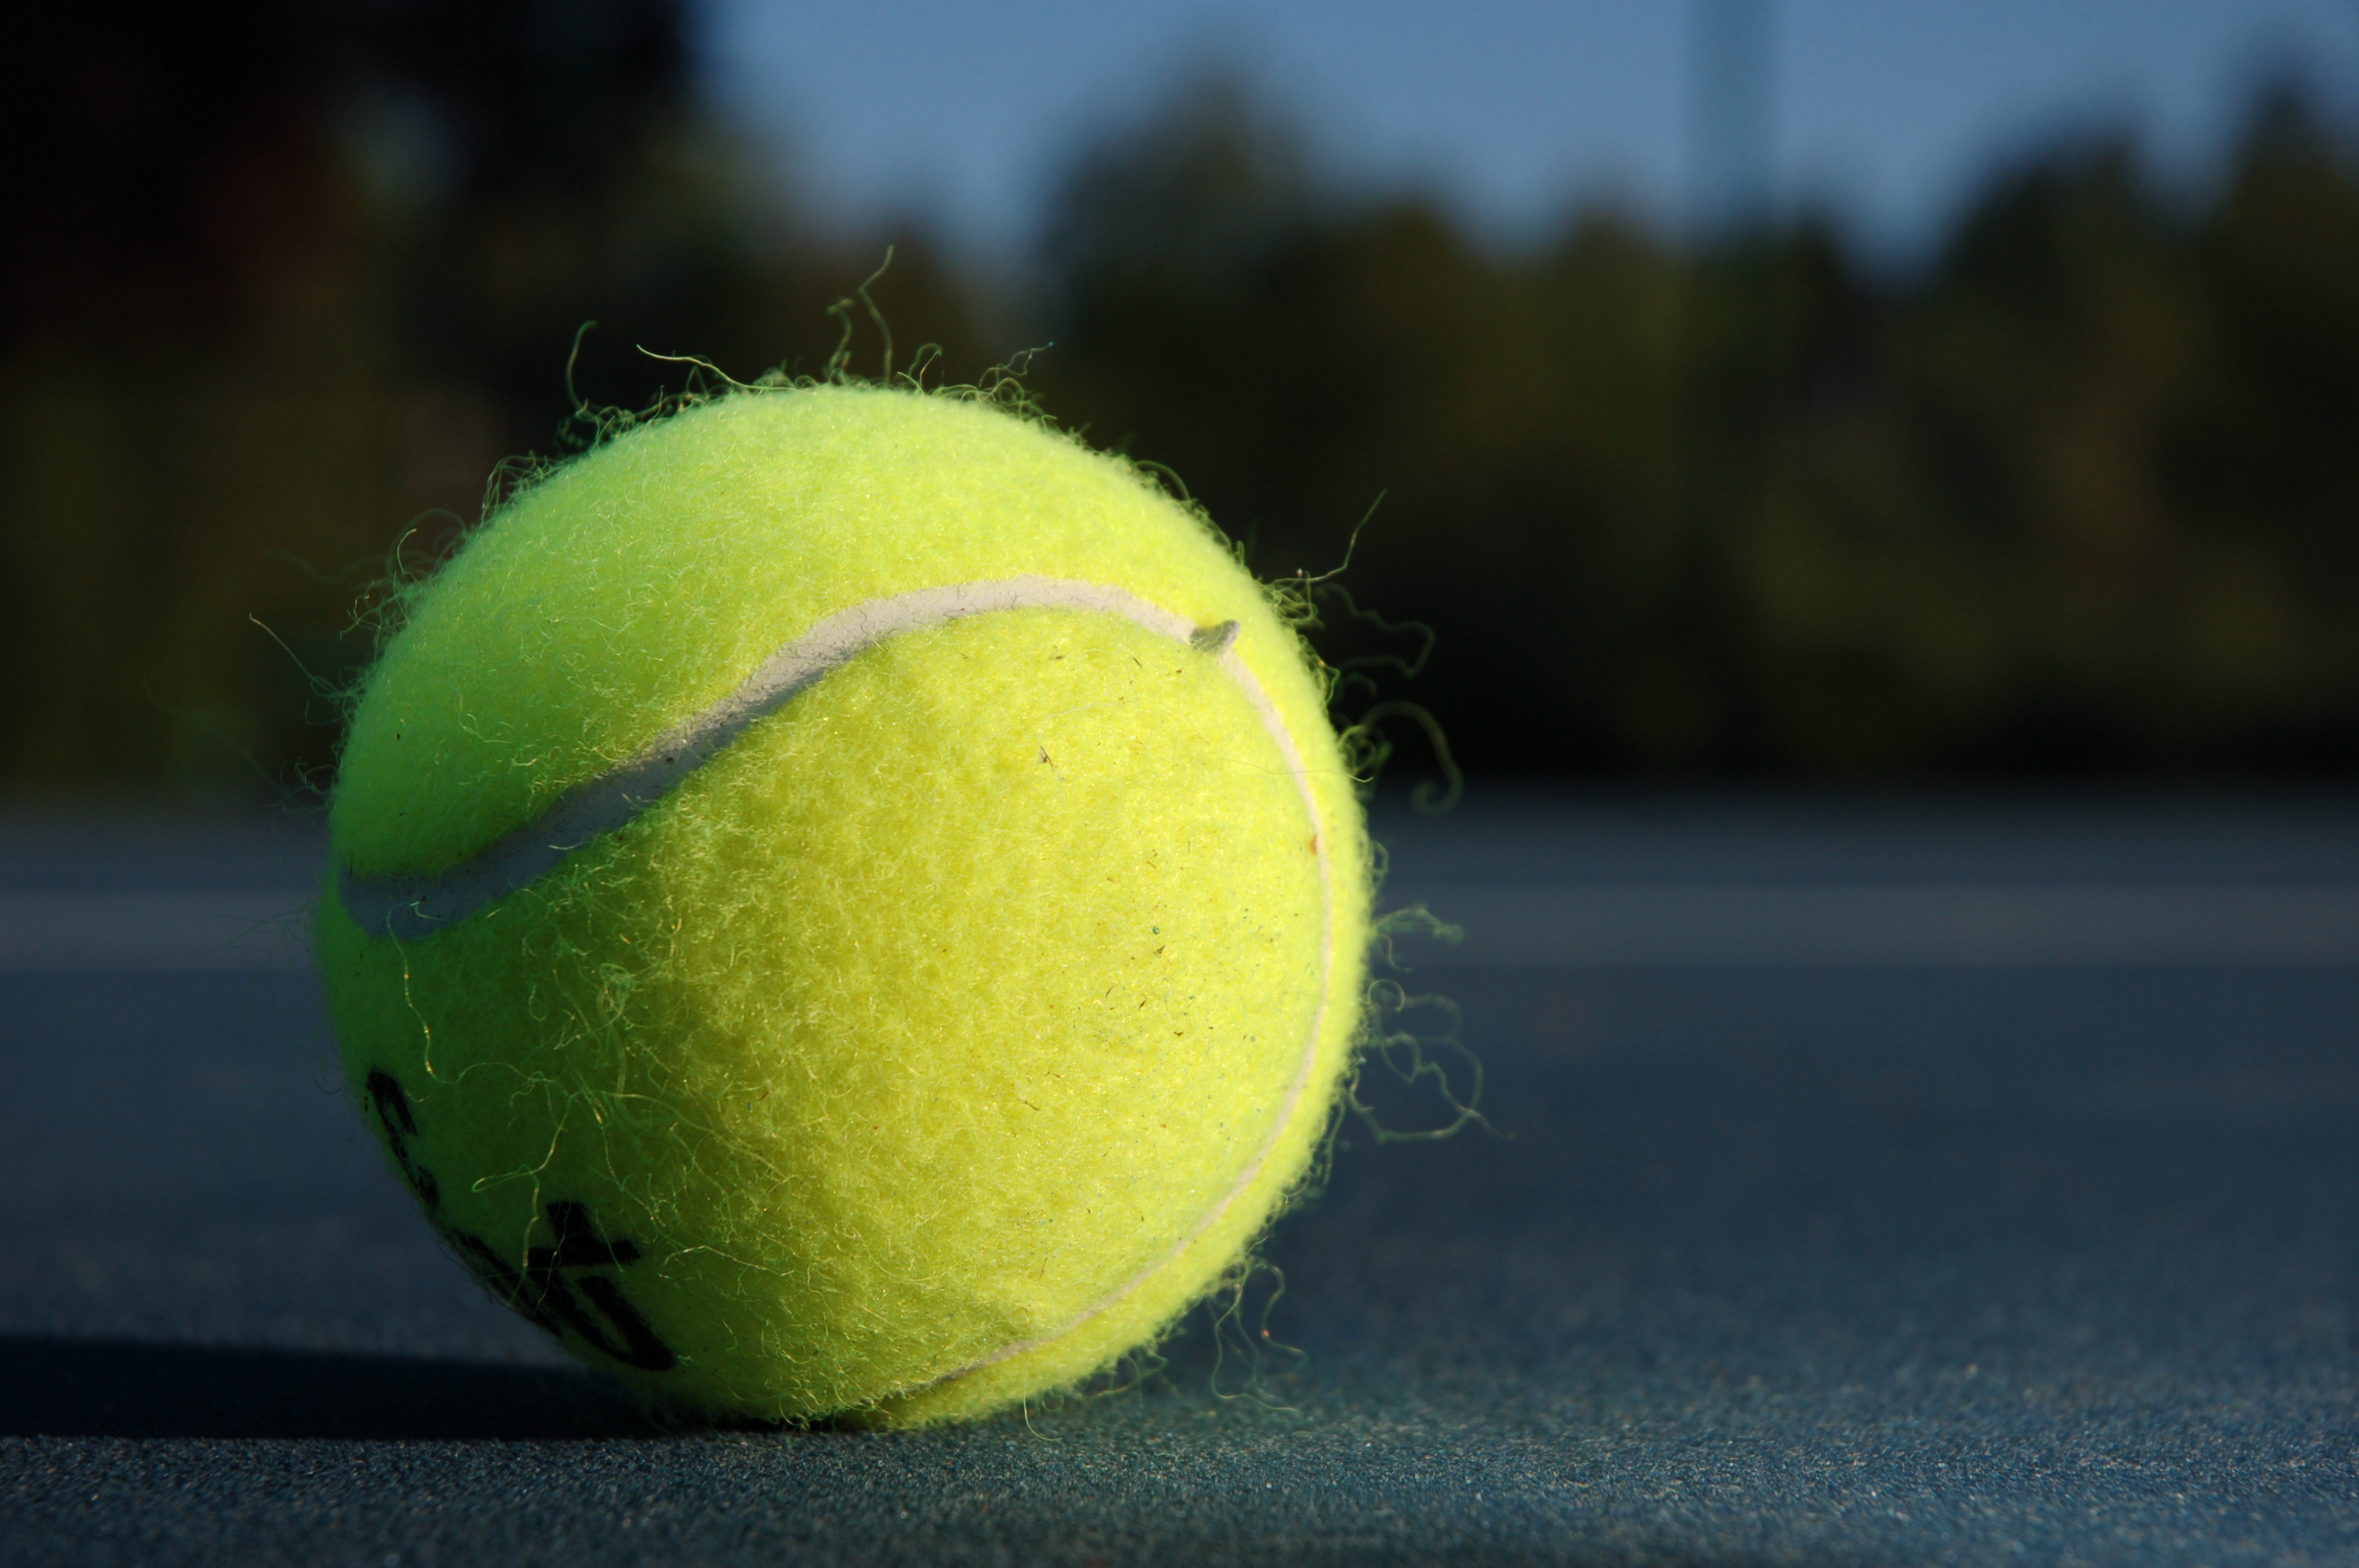

In [3]:
img = Image.open("tennis.jpg")
img

##Viewing the list of models available and selecting one among it(VGG16 in our case)

In [3]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [4]:
model = models.vgg16(pretrained=True)

##Evaluating the model we selected

In [5]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

##Downloading the ***imagenet classes*** text file(basically the output classes for the pretrained models) and storing the list of classes in ***classes*** variable.

In [19]:
!wget https://raw.githubusercontent.com/TanmayKhot/Fluorine/master/imagenet_classes.txt

--2020-09-07 15:10:20--  https://raw.githubusercontent.com/TanmayKhot/Fluorine/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  21.17K  --.-KB/s    in 0.01s   

2020-09-07 15:10:20 (1.64 MB/s) - ‘imagenet_classes.txt’ saved [21675/21675]



In [20]:
with open('imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

##Image transforms and setting up cuda

In [21]:
from torchvision import transforms
input_image = Image.open("tennis.jpg")
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

##Passing the processed input to the model and checking the output shape

In [22]:
with torch.no_grad():
    output = model(input_batch)
    print(output.shape)

torch.Size([1, 1000])


##Choosing the prediction with max probability

In [25]:
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
print(classes[index[0]], percentage[index[0]].item())

tennis ball 99.88074493408203


##Choosing the predictions with top 5 max probabilities

In [26]:
_, indices = torch.sort(output, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('tennis ball', 99.88074493408203),
 ('racket, racquet', 0.11598091572523117),
 ('baseball', 0.0019203964620828629),
 ('rugby ball', 0.0004625900473911315),
 ('volleyball', 0.00017687211220618337)]

syntax for selection of models

In [10]:
"""
alexnet = models.alexnet(pretrained=True)

vgg11 = models.vgg11(pretrained=True)
vgg11_bn = models.vgg11_bn(pretrained=True)
vgg13 =  models.vgg13(pretrained=True)
vgg13_bn = models.vgg13_bn(pretrained=True)
vgg19 = models.vgg19(pretrained=True)
vgg19_bn = models.vgg19_bn(pretrained=True)


resnet18 = models.resnet18(pretrained=True)
resnet34 = models.resnet34(pretrained=True)
resnet50 = models.resnet50(pretrained=True)
resnet101 = models.resnet101(pretrained=True)
resnet152 = models.resnet152(pretrained=True)

squeezenet1_0 = models.squeezenet1_0(pretrained=True)
squeezenet1_1 = models.squeezenet1_1(pretrained=True)

d121 = models.densenet121(pretrained=True)
d161 = models.densenet161(pretrained=True)
d169 = models.densenet169(pretrained=True)
d201 = models.densenet201(pretrained=True)


inception3 = models.inception_v3(pretrained=True)

googlenet = models.googlenet(pretrained=True)
inception3 = models.inception_v3(pretrained=True)

googlenet = models.googlenet(pretrained=True)

mobilenet = models.mobilenet_v2(pretrained=True)

resnext101 = models.resnext101_32x8d(pretrained=True)
resnext50 = models.resnext50_32x4d(pretrained=True)

wideresnet101 = models.wide_resnet101_2(pretrained=True)
wideresnet50 = models.wide_resnet50_2(pretrained=True)



mobilenet = models.mobilenet_v2(pretrained=True)

resnext101 = models.resnext101_32x8d(pretrained=True)
resnext50 = models.resnext50_32x4d(pretrained=True)

wideresnet101 = models.wide_resnet101_2(pretrained=True)
wideresnet50 = models.wide_resnet50_2(pretrained=True)

MNASnet0_5 = models.mnasnet0_5(pretrained=True)
MNASnet1_0 = models.mnasnet1_0(pretrained=True)

"""


'\nalexnet = models.alexnet(pretrained=True)\n\nvgg11 = models.vgg11(pretrained=True)\nvgg11_bn = models.vgg11_bn(pretrained=True)\nvgg13 =  models.vgg13(pretrained=True)\nvgg13_bn = models.vgg13_bn(pretrained=True)\nvgg19 = models.vgg19(pretrained=True)\nvgg19_bn = models.vgg19_bn(pretrained=True)\n\n\nresnet18 = models.resnet18(pretrained=True)\nresnet34 = models.resnet34(pretrained=True)\nresnet50 = models.resnet50(pretrained=True)\nresnet101 = models.resnet101(pretrained=True)\nresnet152 = models.resnet152(pretrained=True)\n\nsqueezenet1_0 = models.squeezenet1_0(pretrained=True)\nsqueezenet1_1 = models.squeezenet1_1(pretrained=True)\n\nd121 = models.densenet121(pretrained=True)\nd161 = models.densenet161(pretrained=True)\nd169 = models.densenet169(pretrained=True)\nd201 = models.densenet201(pretrained=True)\n\n\ninception3 = models.inception_v3(pretrained=True)\n\ngooglenet = models.googlenet(pretrained=True)\ninception3 = models.inception_v3(pretrained=True)\n\ngooglenet = models.